Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". DO NOT edit cells except the one containing `YOUR CODE HERE` or "YOUR ANSWER HERE".  
Erase the line `raise NotImplementedError()`, but do not edit the other code that is already in the notebook. For example do not change the output/input of function if they are already defined.

Make sure you fill  your name and student number below:

In [2]:
NAME = "Lukas Franz"
STUDENT_NUMBER = "23501307"

---

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.testing import assert_allclose as nassert
from scipy.integrate import solve_ivp

# Math 406 Assignment 3 

## Exercise 1


Write Python routines to integrate the initial value ODE:


on an interval $[a,b]$ by means of: the Forward Euler (FE), the Improved
Euler (ImpE), the Backward Euler (BE), the Trapezium Rule (TR), and RK-4.
Use these routines to solve the following ODE:
$$
y^{\prime }=f(x,y),\quad y(a)=y_{0} 
$$

1. Use FE and ImpE to solve: 
$[a,b]=[0,\frac{1}{2}],\; y^{\prime}=10(-1-3^{\frac{1}{2}}i)y,\; y(0)=1,\; y_{\text{exact}}(x)=e^{10(-1-\sqrt{3}i)x}.$ Use the stability region in each case determine the maximal value of the step-size $h_{m}$ for which each method will be stable. Solve and plot the problem with $h<h_{m},\;  h=h_{m},\; h>h_{m}$ to test the theoretical stability results.

YOUR ANSWER HERE

The stability condition for FE for an ode of form $y^\prime = ky$ is that $hk \in \{ z \in \mathbb{C} \ | \ |z+1| \leq 1 \} \implies h \in \{ z \in \mathbb{C} \ | \ |z+1| \leq k \}$

In [4]:
# Your plot

# YOUR CODE HERE
def BE(f, a, b, y0, h, tol=1e-10, max_iter=50):
    num_steps = int((b - a) / h)
    x_vals = np.linspace(a, b, num_steps + 1)
    y_vals = np.zeros_like(x_vals)
    y_vals[0] = y0
    
    for i in range(1, len(x_vals)):
        y_new = y_vals[i - 1]
        for _ in range(max_iter):
            y_next = y_vals[i - 1] + h * f(x_vals[i], y_new)
            if abs(y_next - y_new) < tol:
                break
            y_new = y_next
        y_vals[i] = y_new
    
    return x_vals, y_vals

def FE(dy, a, b, y_a, h):
    x_vals = np.arange(a, b + h, h)
    y_vals = np.zeros_like(x_vals, dtype=complex)
    y_vals[0] = y_a
    
    for i in range(1, len(x_vals)):
        y_vals[i] = y_vals[i - 1] + h * dy(x_vals[i - 1], y_vals[i - 1])
    
    return x_vals, y_vals

def ImpE(dy, a, b, y_a, h):
    x_vals = np.arange(a, b + h, h)
    y_vals = np.zeros_like(x_vals, dtype=complex)
    y_vals[0] = y_a
    
    for i in range(1, len(x_vals)):
        k1 = dy(x_vals[i - 1], y_vals[i - 1])
        k2 = dy(x_vals[i - 1] + h, y_vals[i - 1] + h * k1)
        y_vals[i] = y_vals[i - 1] + (h / 2) * (k1 + k2)
    
    return x_vals, y_vals

def TR(dy, a, b, y_a, h):
    x_vals = np.arange(a, b + h, h)
    y_vals = np.zeros_like(x_vals, dtype=complex)
    y_vals[0] = y_a

    for i in range(1, len(x_vals)):
        y_pred = y_vals[i - 1] + h * dy(x_vals[i - 1], y_vals[i - 1])
        k1 = dy(x_vals[i - 1], y_vals[i - 1])
        k2 = dy(x_vals[i], y_pred)
        y_vals[i] = y_vals[i - 1] + h/2 * (k1+k2)

    return x_vals, y_vals

def RK_4(dy, a, b, y0, h):
    num_steps = int((b-a) / h)
    x_vals = np.linspace(a, b, num_steps + 1)
    h = x_vals[1]-x_vals[0]
    y_vals = np.zeros_like(x_vals)
    y_vals[0] = y0
    
    for i in range(1, len(x_vals)):
        k1 = dy(x_vals[i - 1], y_vals[i - 1])
        k2 = dy(x_vals[i - 1] + h / 2, y_vals[i - 1] + (h / 2) * k1)
        k3 = dy(x_vals[i - 1] + h / 2, y_vals[i - 1] + (h / 2) * k2)
        k4 = dy(x_vals[i - 1] + h, y_vals[i - 1] + h * k3)
        y_vals[i] = y_vals[i - 1] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return x_vals, y_vals

# raise NotImplementedError()

def exact(x):
    return np.exp(10*(-1-(3**0.5)*1j)*x)

def f(x,y):
    return 10*(-1-(3**0.5)*1j)*y

a = 0
b = 0.5



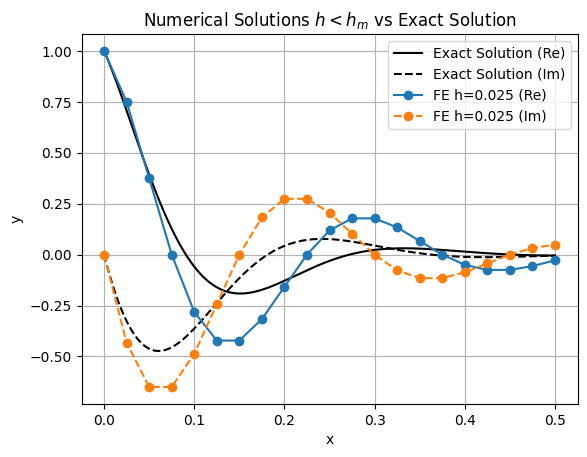

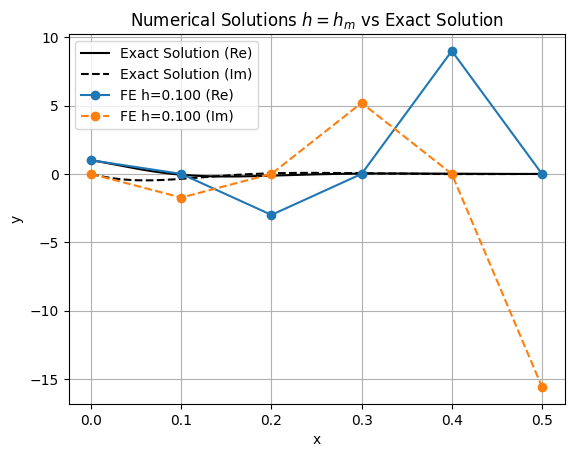

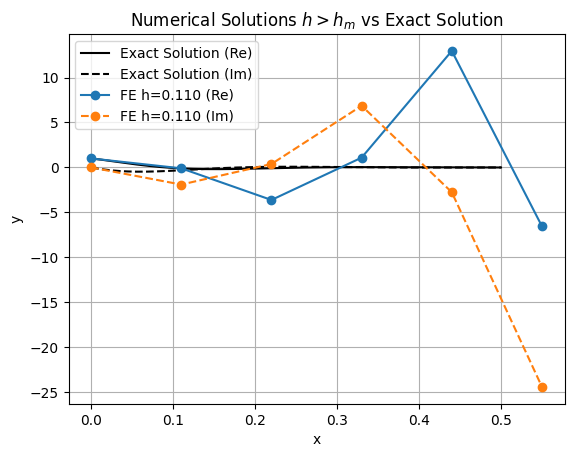

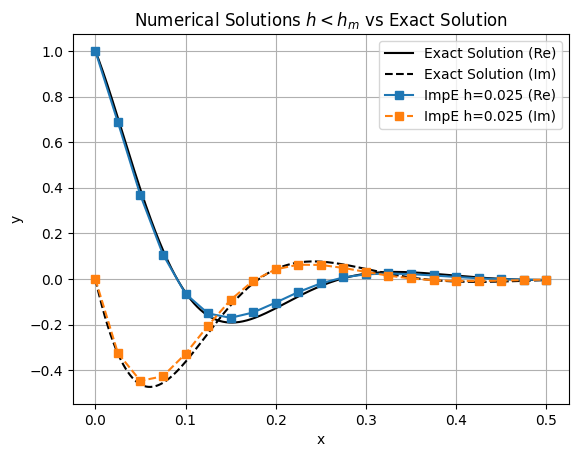

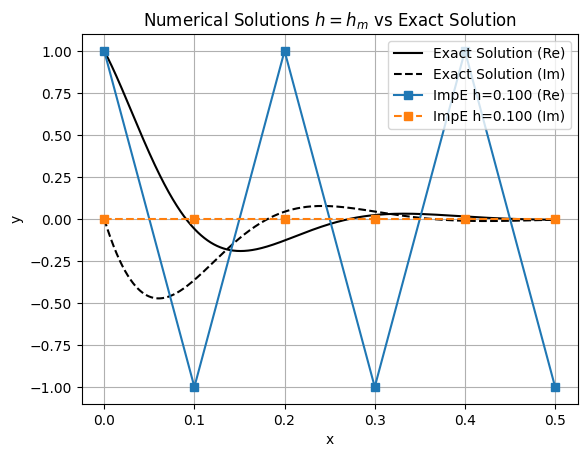

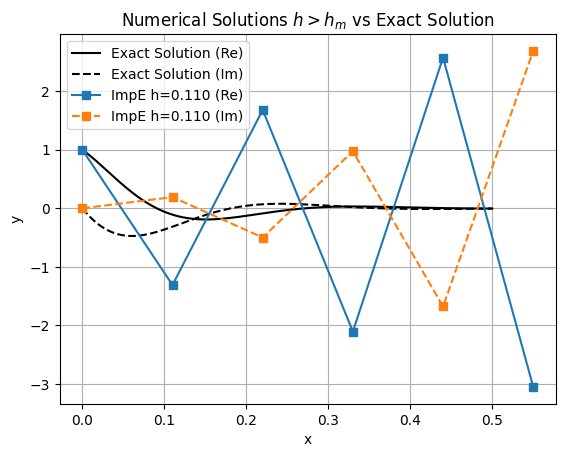

In [ ]:
hm_FE = 0
hm_ImpE = 0
# YOUR CODE HERE
a = 0
b = 0.5
y0 = 1
lambda_val = 10 * (-1 - np.sqrt(3) * 1j)
f = lambda x, y: lambda_val * y

h_FE_max = 2 / abs(lambda_val)
h_ImpE_max = 2 / abs(lambda_val)

h_values = [(h_FE_max / 4, r"$h < h_m$"), (h_FE_max, r"$h = h_m$"), (h_FE_max * 1.1, r"$h > h_m$")]


# Plot solutions
# plt.figure(figsize=(10, 6))
x_exact = np.linspace(a, b, 1000)
y_exact = exact(x_exact)

for h, stability in h_values:
    plt.plot(x_exact, y_exact.real, 'k-', label='Exact Solution (Re)')
    plt.plot(x_exact, y_exact.imag, 'k--', label='Exact Solution (Im)')

    x_fe, y_fe = FE(f, a, b, y0, h)
    plt.plot(x_fe, y_fe.real, 'o-', label=f'FE h={h:.3f} (Re)')
    plt.plot(x_fe, y_fe.imag, 'o--', label=f'FE h={h:.3f} (Im)')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Numerical Solutions '+ stability + ' vs Exact Solution')
    plt.grid()
    plt.show()

for h, stability in h_values:
    plt.plot(x_exact, y_exact.real, 'k-', label='Exact Solution (Re)')
    plt.plot(x_exact, y_exact.imag, 'k--', label='Exact Solution (Im)')

    x_ie, y_ie = ImpE(f, a, b, y0, h)
    plt.plot(x_ie, y_ie.real, 's-', label=f'ImpE h={h:.3f} (Re)')
    plt.plot(x_ie, y_ie.imag, 's--', label=f'ImpE h={h:.3f} (Im)')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Numerical Solutions '+ stability + ' vs Exact Solution')
    plt.grid()
    plt.show()
# raise NotImplementedError()

In [6]:
#Testing answer 


2. Consider the initial value problem (IVP): $[a,b]=[0,1],$ $y^{\prime }=\frac{x}{1+x^{2}}y,$ $y(0)=1,$ $y_{\text{exact}}(x)=\sqrt{1+x^{2}}.$ A
useful way to determine the convergence rate of a given method, without
plotting, is to determine $Y_{N}(h)$ and $Y_{2N}(h/2)$ using the same method
and evaluating following quotient
\begin{equation*}
Q=\log_{2}\frac{E(h)}{E(h/2)} 
\end{equation*}
Assuming that $E(h)=|y_{\text{exact}}(b)-Y_{N}(h)|=ch^{p}$ show that the
quotient $Q$  is just $p$ - the order of the
method. 

YOUR ANSWER HERE

\begin{gather*}
    E(h) = ch^p \\
    E(h/2) = ch^p 2^{-p} \\
    Q = \log_2 \left( \frac{E(h)}{E(h/2)} \right) = \log_2 \left( \frac{ch^p}{ch^p 2^{-p}} \right) = \log(2^p) = p \\
    \square
\end{gather*}

- Now complete the  table A for the following methods by
solving the above ODE to obtain estimates of $y_{\text{exact}}(1)=\sqrt{2}.$ No need to estimate $Q$ for the first column, keep the value 0 instead.

|$Method$|$h=2^{-2}$|$h=2^{-3}$|$h=2^{-4}$ |
|---|---|----|---- |
|$E_{FE}$|$A_{0,0}$|$A_{0,1}$|$A_{0,2}$ |
|$Q_{FE}$|0|*|* |
|$E_{\text{ImpE}}$|$A_{2,0}$|*|*|
|$Q_{\text{ImpE}}$|0|*|* |
|$E_{\text{TR}}$|$A_{4,0}$|*|*|
|$Q_{\text{TR}}$|0|*|* |
|$E_{\text{RK4}}$|$A_{6,0}$|*|*|
|$Q_{\text{RK4}}$|0|*|* |
|$E_{\text{BE}}$|$A_{8,0}$|*|*|
|$Q_{\text{BE}}$|0|*|* |

In [7]:
A = np.zeros((10,3))
# YOUR CODE HERE

def dy(x,y):
    return x*y/(1+x**2)

def exact(x):
    return np.sqrt(1+(x**2))

def compute_errors(method, f, a, b, y0, h_values):
    ex = exact(b)
    errors = []
    for h in h_values:
        y_approx = method(f, a, b, y0 , h)[1][-1]
        errors.append(abs(ex - y_approx))
    return errors

def compute_q(errors):
    qs = [0]
    for i in range(1, len(errors)):
        qs.append(np.log2(errors[i-1] / errors[i]))
    return qs

a, b = 0, 1
y0 = 1
f = lambda x, y: (x / (1 + x**2)) * y
h_values = [2**-2, 2**-3, 2**-4]

methods = {
    "FE": FE,
    "ImpE": ImpE,
    "TR": TR,
    "RK4": RK_4,
    "BE": BE,
}

table = {}
for name, method in methods.items():
    errors = compute_errors(method, f, a, b, y0, h_values)
    qs = compute_q(errors)
    table[name] = (errors, qs)

# Define column width
col_width = 8  # Adjust as needed


# Header row
header = f"| {'Method'.ljust(col_width)} | " + " | ".join(f"h=2^-{i}".ljust(col_width) for i in range(2, 5)) + " |"
separator = f"|{'-' * (col_width + 2)}|" + "|".join(["-" * (col_width + 2)] * 3) + "|"

print("---------------------------------------------")
print(header)
print(separator)

for i, (name, (errors, qs)) in enumerate(table.items()):
    error_row = f"| E_{name.ljust(col_width - 2)} | " + " | ".join(f"{e:.5f}".ljust(col_width) for e in errors) + " |"
    q_row = f"| Q_{name.ljust(col_width - 2)} | " + " | ".join(f"{q:.2f}".ljust(col_width) for q in qs) + " |"
    
    print(error_row)
    print(q_row)

    A[2*i] = errors
    A[2*i+1] = qs


print("---------------------------------------------")
print(A)
# raise NotImplementedError()

---------------------------------------------
| Method   | h=2^-2   | h=2^-3   | h=2^-4   |
|----------|----------|----------|----------|
| E_FE     | 0.10974  | 0.05576  | 0.02813  |
| Q_FE     | 0.00     | 0.98     | 0.99     |
| E_ImpE   | 0.00913  | 0.00218  | 0.00053  |
| Q_ImpE   | 0.00     | 2.07     | 2.04     |
| E_TR     | 0.00913  | 0.00218  | 0.00053  |
| Q_TR     | 0.00     | 2.07     | 2.04     |
| E_RK4    | 0.00001  | 0.00000  | 0.00000  |
| Q_RK4    | 0.00     | 3.94     | 3.96     |
| E_BE     | 0.11898  | 0.05804  | 0.02870  |
| Q_BE     | 0.00     | 1.04     | 1.02     |
---------------------------------------------
[[1.09742974e-01 5.57554481e-02 2.81296659e-02]
 [0.00000000e+00 9.76943890e-01 9.87020365e-01]
 [9.13480805e-03 2.18276858e-03 5.32085055e-04]
 [0.00000000e+00 2.06521523e+00 2.03643039e+00]
 [9.13480805e-03 2.18276858e-03 5.32085055e-04]
 [0.00000000e+00 2.06521523e+00 2.03643039e+00]
 [1.24412247e-05 8.10387335e-07 5.21223997e-08]
 [0.00000000e+00 3.9

In [8]:
#Testing answer 


# Exercise 2
Consider the difference scheme:
\begin{equation*}
Y_{k+2}=Y_{k}+\frac{h}{2}(f_{k+1}+3f_{k}) 
\end{equation*}
Determine:

1. The (global) truncation error

YOUR ANSWER HERE

\begin{gather*}
    y(x_{k+2}) &=& y(x_k) + 2h y'(x_k) + \frac{(2h)^2}{2!}y''(x_k) + \frac{(2h)^3}{3!}y'''(x_k) + \frac{(2h)^4}{4!}y^{(4)}(x_k) + O(h^5) \\
    y(x_{k+2}) &=& y(x_k) + 2h f(x_k, y(x_k)) + \frac{(2h)^2}{2!}f'(x_k, y(x_k)) + \frac{(2h)^3}{3!}f''(x_k, y(x_k)) + O(h^4) \\

    f_{k+1} &=& f(x_k+h, y(x_k+h)) = f_k + hf_k' + \frac{h^2}{2}f_k'' + O(h^3) \\
    \frac{h}{2}(f_{k+1} + 3f_k) &=& \frac{h}{2}\left(f_k + h f'_k + \frac{h^2}{2}f''_k + O(h^3) + 3f_k\right) = 2hf_k +  \frac{h^2}{2}f_k'+ \frac{h^3}{4}f_k''+ O(h^4)
\end{gather*}
Therefore we can see that
\begin{gather*}
    y(x_{k+2}) &=& y(x_k) + \frac{h}{2}(f_{k+1} + 3f_k) \\
    \implies Y_{k+2} &=& Y_{k}+\frac{h}{2}(f_{k+1}+3f_{k}) \\
\end{gather*}
$\square$

2. The stability region by considering the model problem
in which: $f(x,y)=\lambda y,\ y(0)=1$ and converting the routine 
`StabregionsImplicit` posted on the web. 

YOUR ANSWER HERE

\begin{gather*}
    f_k &=& \lambda y_k \\
    Y_{k+2} &=& Y_{k}+\frac{h}{2}(\lambda Y_{k+1}+3\lambda Y_{k}) = Y_k \left(1 + \frac{3h\lambda}{2} \right) + \frac{h\lambda}{2} Y_{k+1} \\
    G^2 - \frac{h\lambda}{2} G - \left(1 + \frac{3h\lambda}{2} \right) &=& 0 \implies G = \frac{\frac{h\lambda} {2} \pm \sqrt{\frac{h^2\lambda^2}{4} - 4\left(1 + \frac{3h\lambda}{2} \right)}}{2} \\
    \implies G &=& \frac{1}{4} \left(h\lambda \pm \sqrt{h^2\lambda^2 + 24 h\lambda + 16 }\right)
\end{gather*}

Our stability region is when $|G| \leq 1 $

Plot the region boundary :

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/contour.py:1371: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/contour.py:1372: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2892: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


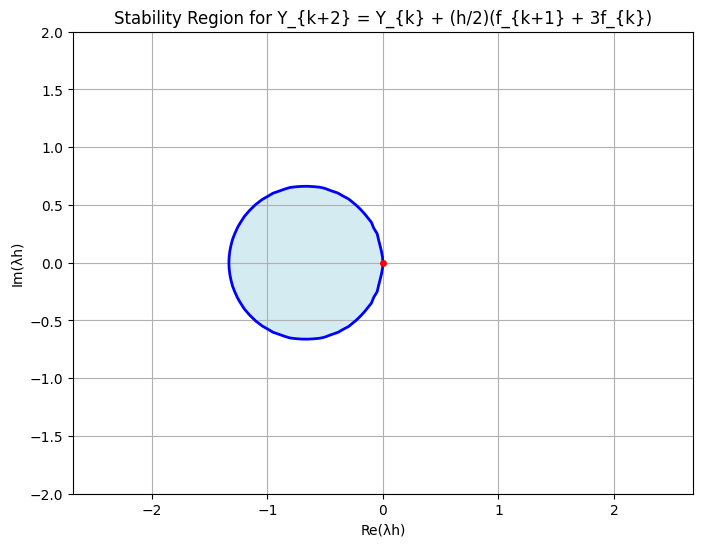

In [9]:
# Your plot

# YOUR CODE HERE
x_min, x_max = -2, 2
y_min, y_max = -2, 2
h = 0.05

real = np.arange(x_min, x_max + h, h)
imag = np.arange(y_min, y_max + h, h)
x, y = np.meshgrid(real, imag)
z = x.T + 1j * y.T

G = np.zeros_like(z)

for i in range(len(real)):
    for j in range(len(imag)):
        z_val = z[i, j]
        coeffs = [1, -z_val/2, -(1 + 3*z_val/2)]
        G[i, j] = max(abs(np.roots(coeffs)))

plt.figure(figsize=(8, 6))
contour = plt.contour(real, imag, G.T, levels=[1], colors='b', linewidths=2)
plt.contourf(real, imag, G.T, levels=[0, 1], colors=['lightblue'], alpha=0.5)
plt.plot(0, 0, 'ro', markersize=4)

plt.grid(True)
plt.xlabel('Re(λh)')
plt.ylabel('Im(λh)')
plt.title('Stability Region for Y_{k+2} = Y_{k} + (h/2)(f_{k+1} + 3f_{k})')
plt.axis('equal')

plt.show()

3. Make the substitution $Y_{k}=G^{k}$ in the scheme applied to the model
problem and parameterize the boundary of the stability region $|G| =1$ by making the substitution $G=e^{i\theta }.$ Now obtain an
expression for the so-called boundary locus $z=h\lambda =g(\theta ).$ How
does this compare with the stability region obtained in (2)?

YOUR ANSWER HERE


\begin{gather*}
    Y_{k+2} &=& Y_k \left(1 + \frac{3h\lambda}{2} \right) + \frac{h\lambda}{2} Y_{k+1} \to 
    G^{k+2} &=& G^k \left(1 + \frac{3h\lambda}{2} \right) + \frac{h\lambda}{2} G^{k+1}
\end{gather*}
From here since $G \not = 0$:
\begin{gather*}
    G^{k+2} &=& G^k \left(1 + \frac{3h\lambda}{2} \right) + \frac{h\lambda}{2} G^{k+1} \\
    G^2 &=& \left(1 + \frac{3h\lambda}{2} \right) + \frac{h\lambda}{2} G \\
    0 &=& G^2 - \frac{z}{2} G - \left(1 + \frac{3z}{2} \right)
\end{gather*}
Subbing $G = e^{i\theta}$ :
\begin{gather*}
    0 &=& e^{2i\theta} - \frac{z}{2} e^{i\theta} - 1 - \frac{3z}{2} \\
    z\left( \frac{3}{2} + \frac{e^{i\theta}}{2} \right) &=& e^{2i\theta} - 1 \\
    z &=& \frac{2(e^{2i\theta} - 1)}{3 + e^{i\theta}}
\end{gather*}
Graphically the edge of stability looks the same as the one determined in (2) (TODO: numerically compare?)

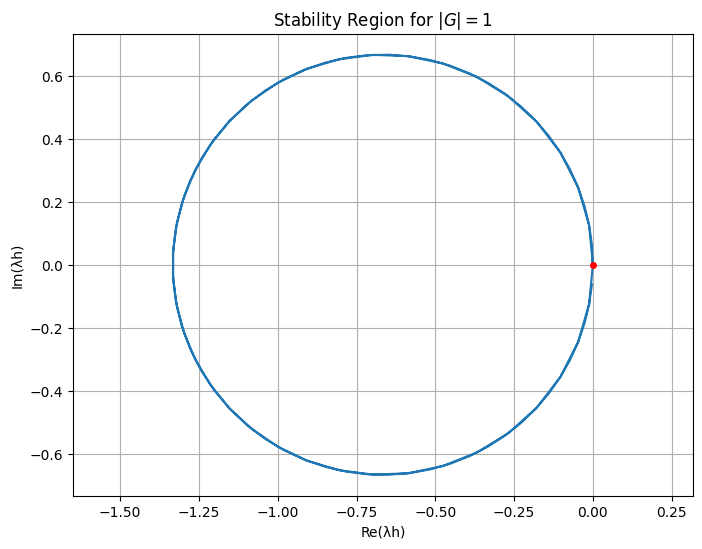

In [ ]:
def z(theta):
    return 2*(np.exp(2j*theta) - 1) / (3+np.exp(1j*theta))

theta = np.linspace(0, 2*np.pi, 100, endpoint=False)

val = z(theta)

plt.figure(figsize=(8, 6))

plt.plot(np.real(val), np.imag(val))

plt.plot(0, 0, 'ro', markersize=4)

plt.grid(True)
plt.xlabel('Re(λh)')
plt.ylabel('Im(λh)')
plt.title(r'Stability Region for $|G| = 1$')
plt.axis('equal')

plt.show()

# Exercise 3

Consider the following model problem for a stiff ODE:

\begin{equation*}
y^{\prime }=-\alpha (y-\sin (x))+\cos (x),\; y(0)=1
\end{equation*}

for which the exact solution is $y=\sin x+e^{-\alpha x}.$ Observe that there
are two very different time scales built into this problem.


1. Use your RK2/ImpE code, the Crank-Nicolson method, and the Backward
Euler scheme to solve this problem with $\alpha =1000$ on the interval $%
[0,\pi ].$ Start with about 20 steps for each of these methods. Plot each of
these solutions and compare them to the exact solution. Explain each of the
phenomena you observe.

- RK2:


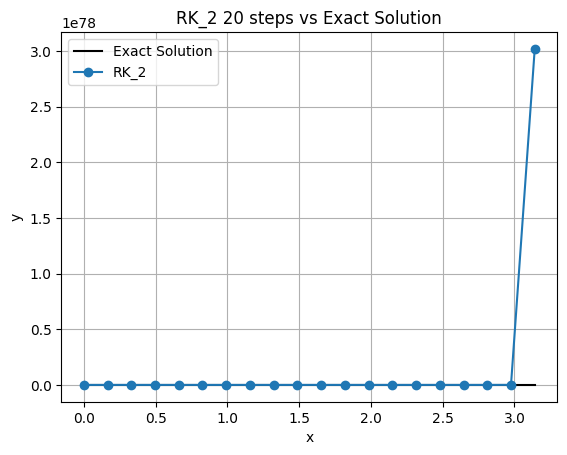

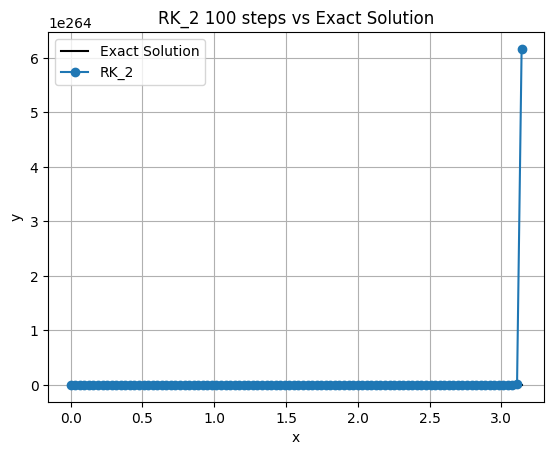

/var/folders/tf/v99lmlx935dbd8d_7_l32x0w0000gn/T/ipykernel_8501/739477428.py:7: RuntimeWarning: overflow encountered in scalar multiply
  return -alpha*(y-np.sin(x)) + np.cos(x)
/var/folders/tf/v99lmlx935dbd8d_7_l32x0w0000gn/T/ipykernel_8501/739477428.py:17: RuntimeWarning: invalid value encountered in scalar add
  yp = y_vals[i - 1] + h * k1


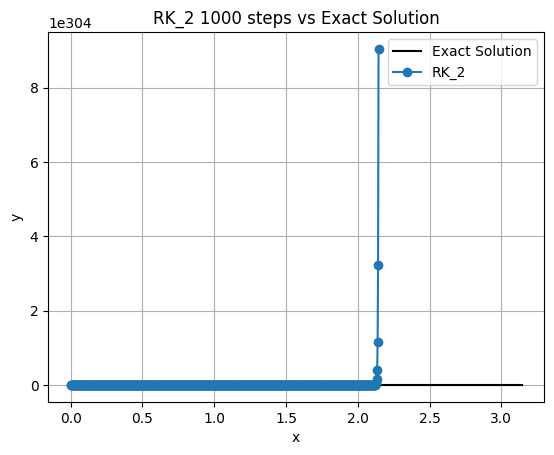

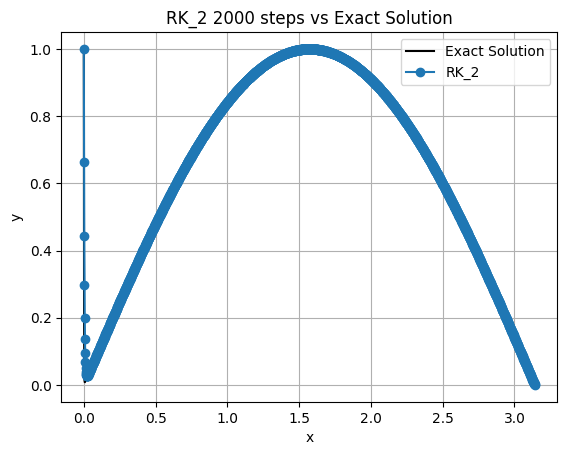

In [68]:
# Your plot RK2

def exact(x):
    return np.sin(x) + np.exp(-alpha*x)

def f(x, y):
    return -alpha*(y-np.sin(x)) + np.cos(x)

def RK_2(f, a, b, y0, steps):
    x_vals = np.linspace(a, b, steps)
    h = x_vals[1]-x_vals[0]
    y_vals = np.zeros_like(x_vals)
    y_vals[0] = y0
    
    for i in range(1, len(x_vals)):
        k1 = f(x_vals[i - 1], y_vals[i - 1])
        yp = y_vals[i - 1] + h * k1
        k2 = f(x_vals[i], yp)
        y_vals[i] = y_vals[i - 1] + h/2 *(k1 + k2)
    
    return x_vals, y_vals

alpha = 1000
y0 = 1
a = 0
b = np.pi


for steps in [20, 100, 1000, 2000]:
    x_exact = np.linspace(a, b, steps)
    y_exact = exact(x_exact)

    plt.plot(x_exact, y_exact.real, 'k-', label='Exact Solution')

    x_rk2, y_rk2 = RK_2(f, a, b, y0, steps)

    plt.plot(x_rk2, y_rk2.real, 'o-', label=f'RK_2')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'RK_2 {steps} steps vs Exact Solution')
    plt.grid()
    plt.show()

# YOUR CODE HERE
# raise NotImplementedError()

In [18]:
def p():
    return np.zeros(10),np.zeros(10)

methods = {
    "a" : p()
}

print(methods)

{'a': (array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))}


YOUR ANSWER HERE

With large steps the RK_2 solution is unstable and just becomes exponential because $-\alpha y$ dominates $y^\prime$ which makes it have a very large error right after the first 

- Crank-Nicolson:

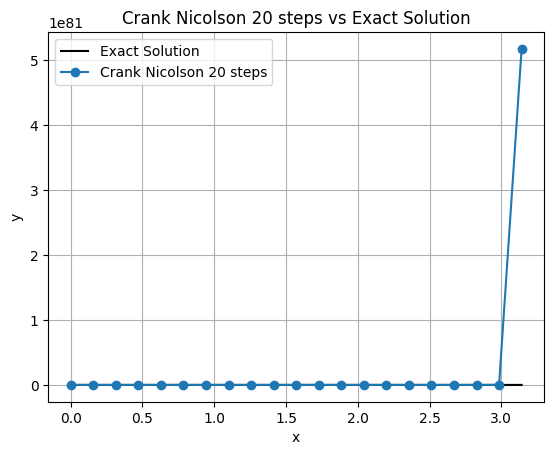

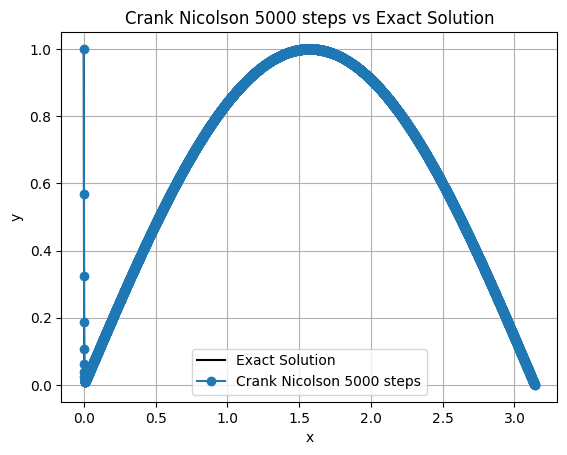

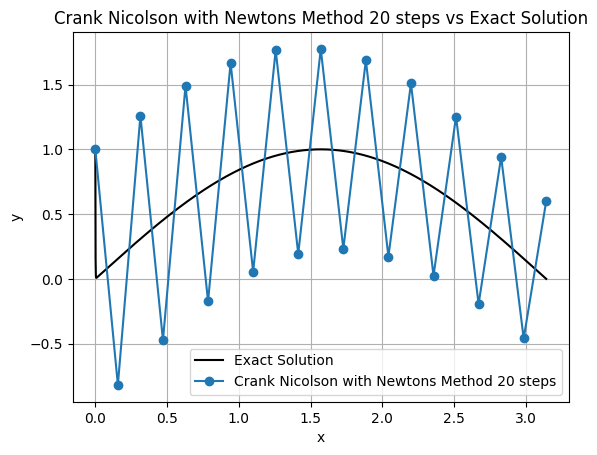

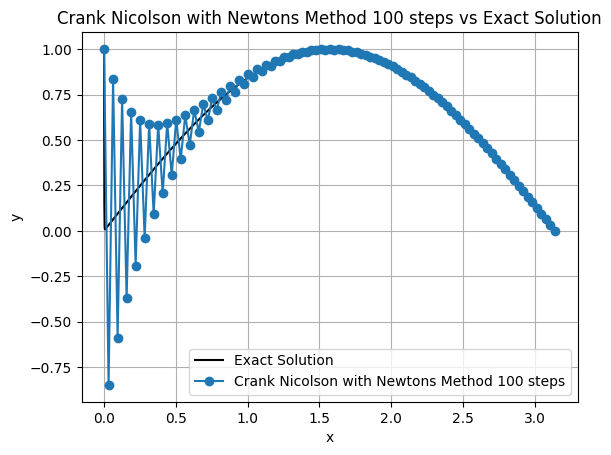

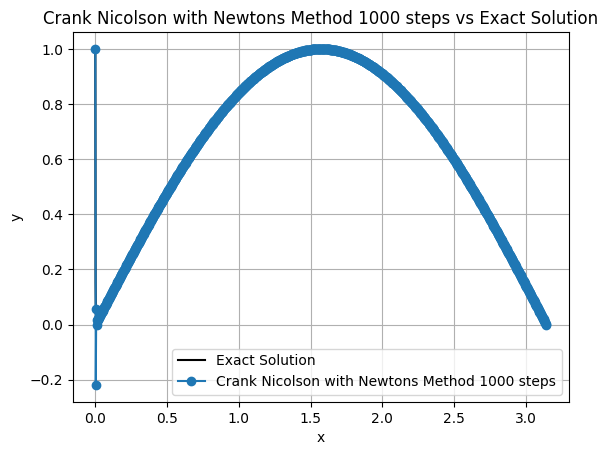

In [55]:
# # Your plot Crank-Nicolson

# # YOUR CODE HERE
alpha = 1000
y0 = 1
a = 0
b = np.pi

def crank_nicolson(f, a, b, y0, steps):
    x_vals = np.linspace(a, b, steps+1)
    h = (b - a) / steps

    y_vals = np.zeros(steps+1)
    y_vals[0] = y0

    for i in range(steps):
        y_pred = y_vals[i] + h * f(x_vals[i], y_vals[i])
        k1 = f(x_vals[i], y_vals[i])
        k2 = f(x_vals[i+1], y_pred)
        y_vals[i+1] = y_vals[i] + 0.5 * h * (k1 + k2)

    return x_vals, y_vals

def crank_nicolson_newton(f, df_dy, a, b, y0, steps, max_iter=100, tol=1e-10):
    x_vals = np.linspace(a, b, steps+1)
    h = (b - a) / steps

    y_vals = np.zeros(steps+1)
    y_vals[0] = y0

    for i in range(steps):
        y_est = y_vals[i] + h * f(x_vals[i], y_vals[i])

        for _ in range(max_iter):
            f_k  = f(x_vals[i], y_vals[i])
            f_k1 = f(x_vals[i+1], y_est)
            r = y_est - y_vals[i] - 0.5 * h * (f_k + f_k1)

            j = 1.0 - 0.5 * h * df_dy(x_vals[i+1], y_est)

            delta = r / j
            y_est -= delta
            # print("y_est", y_est, delta)

            if abs(delta) < tol:
                break
        # print("----")
        
        y_vals[i+1] = y_est

    return x_vals, y_vals

def df_dy(x, y):
    return -alpha

methods = {
    "Crank Nicolson 20 steps" : 
       crank_nicolson(f, a, b, y0, 20),
    "Crank Nicolson 5000 steps" : 
        crank_nicolson(f, a, b, y0, 5000),
    "Crank Nicolson with Newtons Method 20 steps" : 
        crank_nicolson_newton(f, df_dy, a, b, y0, 20),
    "Crank Nicolson with Newtons Method 100 steps" : 
        crank_nicolson_newton(f, df_dy, a, b, y0, 100),
    "Crank Nicolson with Newtons Method 1000 steps" : 
        crank_nicolson_newton(f, df_dy, a, b, y0, 1000),
}

x_exact = np.linspace(a, b, 5000)
y_exact = exact(x_exact)
   
for name, [x_vals, y_vals] in methods.items():
    plt.plot(x_exact, y_exact, 'k-', label='Exact Solution')
    plt.plot(x_vals, y_vals.real, 'o-', label=name)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(name + ' vs Exact Solution')
    plt.grid()
    plt.show()
# # raise NotImplementedError()
# TODO

YOUR ANSWER HERE

The crank nicolson method without newton does not converge until ~5000 steps are taken where it then approximates it very well. The crank nicolson with newtons method always converge but slowly at small steps and approximates it farily well above 100 steps and very well at 1000 steps.

- Backward Euler:

/var/folders/tf/v99lmlx935dbd8d_7_l32x0w0000gn/T/ipykernel_8501/739477428.py:7: RuntimeWarning: overflow encountered in scalar multiply
  return -alpha*(y-np.sin(x)) + np.cos(x)
/var/folders/tf/v99lmlx935dbd8d_7_l32x0w0000gn/T/ipykernel_8501/3284534517.py:13: RuntimeWarning: invalid value encountered in scalar add
  y_next = y_vals[i - 1] + h * f(x_vals[i], y_new)


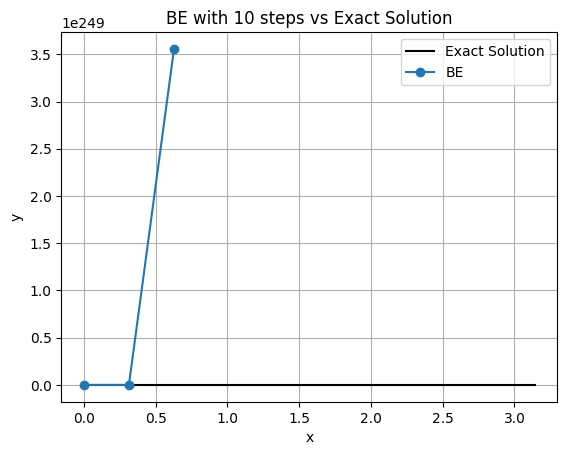

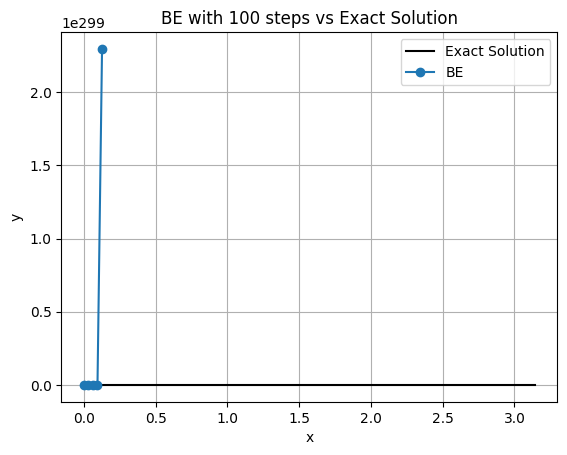

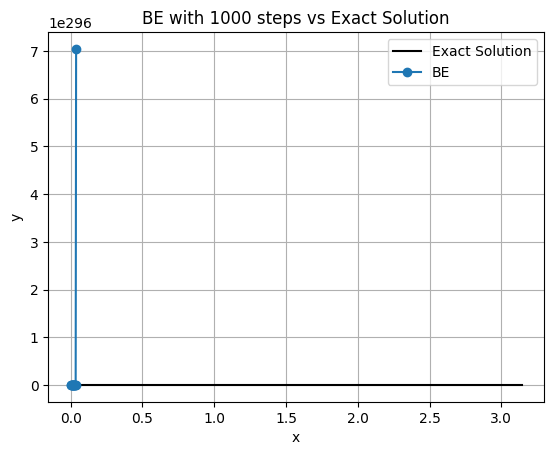

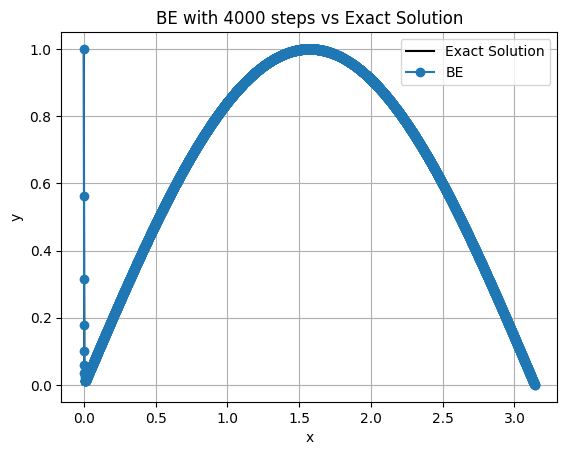

In [58]:
# Your plot Backward Euler

# YOUR CODE HERE
x_exact = np.linspace(a, b, 1000)
y_exact = exact(x_exact)

for steps in [10, 100, 1000, 4000]:
    plt.plot(x_exact, y_exact.real, 'k-', label='Exact Solution')

    x_rk2, y_rk2 = BE(f, a, b, y0, (b-a) / steps)

    plt.plot(x_rk2, y_rk2.real, 'o-', label=f'BE')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'BE with {steps} steps vs Exact Solution')
    plt.grid()
    plt.show()
# raise NotImplementedError()

YOUR ANSWER HERE

The BE method is unstable until ~4000 stpes where it becomes a very accurate approximation of the ODE.

2. Determine theoretically how many steps (as an integer) N_RK2 will be required for the RK2
algorithm to work. Confirm these results with a numerical experiment (plot for N_RK2-1 and N_RK2+4).

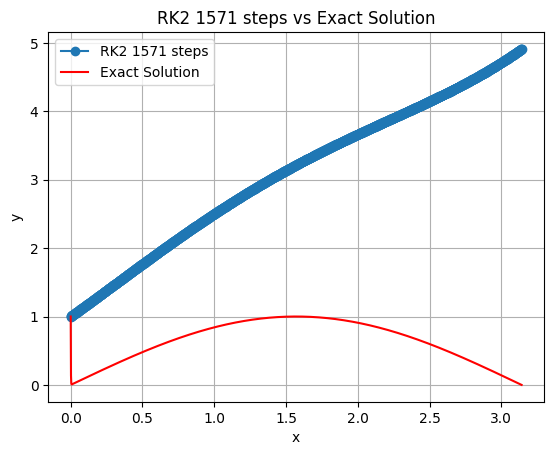

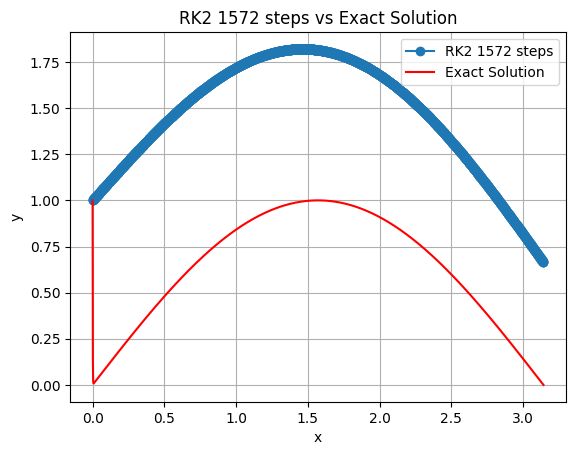

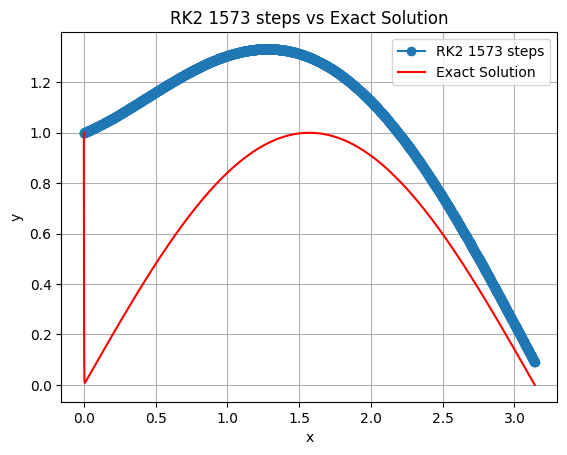

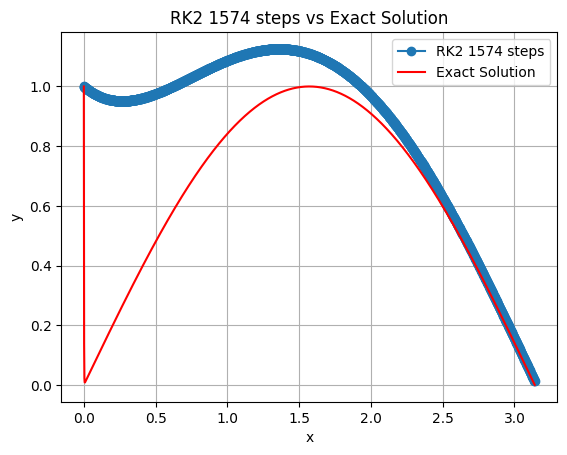

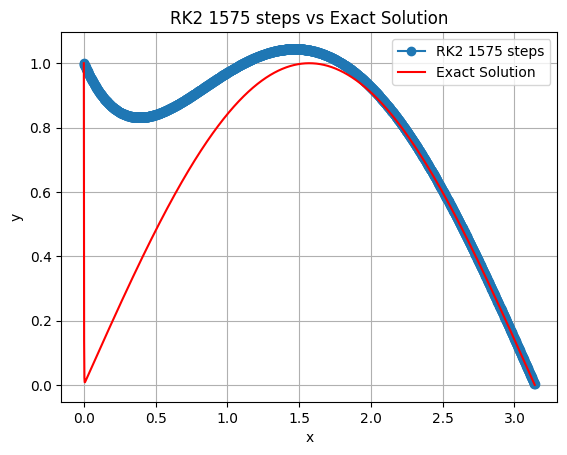

In [73]:
N_RK2 = 1572
# YOUR CODE HERE

steps_arr=np.arange(N_RK2-1, N_RK2+4, 1)
for steps in steps_arr:
    x_vals, y_vals = RK_2(f, a, b, y0, steps)
    plt.plot(x_vals, y_vals, 'o-', label=f'RK2 {steps} steps')

    x_exact = np.linspace(a, b, steps)
    y_exact = exact(x_exact)
    plt.plot(x_exact, y_exact.real, 'r-', label='Exact Solution')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'RK2 {steps} steps vs Exact Solution')
    plt.grid()
    plt.show()
# raise NotImplementedError()

In [ ]:
#Testing answer 


In [ ]:
# Your plot

# YOUR CODE HERE
# raise NotImplementedError()

YOUR ANSWER HERE


3. Will adaptive time stepping alleviate the problem? Use the method `RK23` of the Python
routine `solve_ivp` to solve this problem to a tolerance of $10^{-4}.$ How many
steps (N_RK23) does it require? What can you conclude from this example?


In [77]:
N_RK23 = 1260
# YOUR CODE HERE
sol = solve_ivp(f, [a, b], [y0], method='RK23', atol=1e-4)
num_steps = len(sol.t) -1
print(f"{num_steps} are required")


# raise NotImplementedError()

1260 are required


In [ ]:
#Testing answer 


YOUR ANSWER HERE
Adaptive time stepping reduced the amount of steps needed by 312 steps

# Exercise 4: Conservative Schemes
Consider the following parametric
representation for a circle of radius $r$: $(x,y)=(r\cos \theta ,r\sin\theta ).$ Differentiating with respect to $\theta $ we obtain the following
system of ODE:

\begin{align*}
x^{\prime } &=&-y,\text{ }x(0)=r \\
y^{\prime } &=&x,\text{ }y(0)=0
\end{align*}

whose solution trajectory $(x(\theta ),y(\theta ))$ is, by construction, a
circle of radius $r.$


1. Use the Forward Euler, the Backward Euler, and the trapezoidal methods
to solve this system and plot the solution trajectories $(x(\theta),y(\theta )).$ In your simulations use $h=0.02$ over the interval $0\leq\theta \leq 120.$ Is the expected circle reproduced in each case?

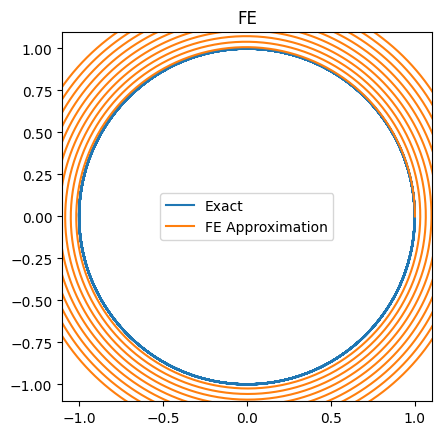

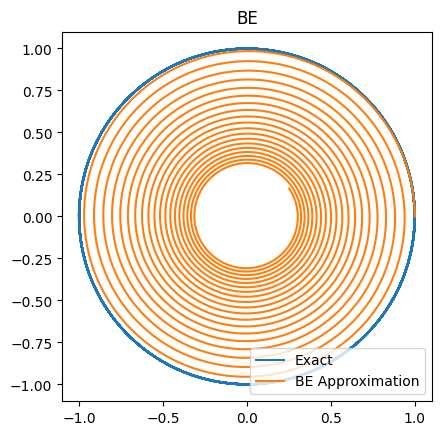

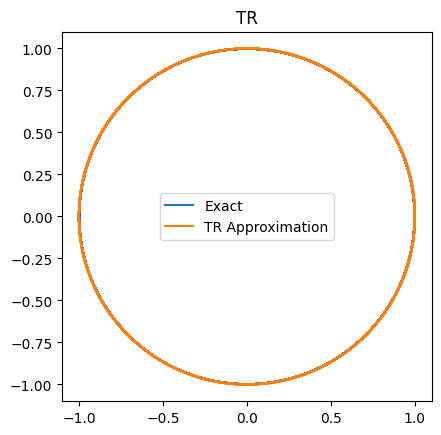

In [ ]:
# Your plots

# YOUR CODE HERE
h = 0.02
a = 0
b = 120
r = 1

x = lambda theta : r*np.cos(theta)
y = lambda theta : r*np.sin(theta)
x0 = x(0)
y0 = y(0)

# dx = lambda x, y : -y
# dy = lambda x, y : x
dx = lambda x, y : -y
dy = lambda x, y :  x

def system_FE(dx, dy, x0, y0, a, b, h):
    steps = int((b-a)/h)
    x_vals = np.zeros(steps)
    y_vals = np.zeros(steps)
    x_vals[0] = x0
    y_vals[0] = y0

    for i in range(1, steps):
        x_vals[i] = x_vals[i-1] + h/2*dx(x_vals[i-1], y_vals[i-1])
        y_vals[i] = y_vals[i-1] + h/2*dy(x_vals[i-1], y_vals[i-1])

    return x_vals, y_vals

def system_BE(dx, dy, x0, y0, a, b, h):
    """
    ONLY FOR THIS SYSTEM IN Q4 WHICH WAS ANALYICALLY SOLVED SEE NEXT PART
    """
    steps = int((b-a)/h)
    x_vals = np.zeros(steps)
    y_vals = np.zeros(steps)
    x_vals[0] = x0
    y_vals[0] = y0

    denominator = 1 + h**2
    for i in range(1, steps):
        x_vals[i] = (x_vals[i-1] - h*y_vals[i-1]) / denominator
        y_vals[i] = (y_vals[i-1] + h*x_vals[i-1]) / denominator

    return x_vals, y_vals

def system_TR(dx, dy, x0, y0, a, b, h):
    """
    ONLY FOR THIS SYSTEM IN Q4 WHICH WAS ANALYICALLY SOLVED SEE NEXT PART
    """
    steps = int((b-a)/h)
    x_vals = np.zeros(steps)
    y_vals = np.zeros(steps)
    x_vals[0] = x0
    y_vals[0] = y0

    denominator = 1 + h**2
    for i in range(1, steps):
        factor1 = 1 - h**2/4
        factor2 = 1 + h**2/4
        
        x_vals[i] = (x_vals[i-1]*factor1 - h*y_vals[i-1]) / factor2
        y_vals[i] = (y_vals[i-1]*factor1 + h*x_vals[i-1]) / factor2

    return x_vals, y_vals

methods = {
    "FE" : system_FE,
    "BE" : system_BE,
    "TR" : system_TR,
}

for name, method in methods.items():
    theta = np.linspace(0, 120, 1000)
    plt.plot(x(theta), y(theta), label=f"Exact")

    x_, y_ = method(dx, dy, x0, y0, a, b, h)

    plt.axis('scaled')
    plt.plot(x_, y_, label=f"{name} Approximation")
    plt.legend()
    plt.title(name)
    plt.show()
# raise NotImplementedError()

YOUR ANSWER HERE

1. The BE solution spirals inwards making it inacurate as $\theta$ gets larger.
2. The FE solution spirals outwards making it inacurate as $\theta$ gets larger.
3. The TR solution creates a circle making it the most accurate approximation even as $\theta$ gets larger.

2. By multiplying the first equation by $x$ and the second equation by $y$
, adding the two resulting equations, and integrating, show that the
quantity $r^{2}=$ constant is a conserved quantity of the system of ODE
(given the source of the ODE this is to be expected). By performing a
similar analysis on each of the difference equations for the numerical
schemes in (a), determine the extent to which they will conserve the radius (find a relation between the squared radii $R_n^2$ and $R_{n+1}^2$).
Use the results of your analysis to explain the numerical results that you
obtained in (a).

- Forward Euler :

YOUR ANSWER HERE

Generally:
\begin{gather*}
    xx' = -xy \\
    yy' = xy  \\
    \implies xx' + yy' = -xy + xy = 0 
    = \frac{1}{2}\frac{\partial}{\partial \theta}(x^2 + y^2) = \frac{1}{2}\frac{\partial}{\partial \theta}(r^2) = 0 \\
    \implies r^2 = \textrm{constant}
\end{gather*}

FE:
\begin{gather*}
    x_{n+1} = x_n - hy_n \\
    y_{n+1} = y_n + hx_n \\
    R^2_{n+1} = x^2_{n+1} + y^2_{n+1} = (x_n - hy_n)^2 + (y_n + hx_n)^2 \\
    = h^2 x_{n+1}^2 + h^2 y_{n+1}^2 + x_{n+1}^2 + y_{n+1}^2 = R^2_n (1 + h^2)
\end{gather*}
since $h^2 > 0$ it makes sense why $R_n$ increases as $n$ increases as $R_n^2 = R_0^2(1+h^2)^n$

- Backward Euler:

YOUR ANSWER HERE

\begin{gather*}
    x_{n+1} = x_n - hy_{n+1} \\
    y_{n+1} = y_n + hx_{n+1} \\
    x_{n+1} = x_n - h(y_n + hx_{n+1}) \implies x_{n+1} = \frac{x_n - hy_n}{1 + h^2} \\
    y_{n+1} = y_n + h\frac{x_n - hy_n}{1 - h^2} = \frac{y_n+hx_n}{1+h^2}
    
    \\\\

    R^2_{n+1} = x^2_{n+1} + y^2_{n+1} = \left( \frac{x_n - hy_n}{1 + h^2} \right)^2 + \left( \frac{y_n+hx_n}{1+h^2} \right)^2 \\
    = \frac{1}{(1+h^2)^2}((x_n - hy_n)^2 + (y_n+hx_n)^2) = \frac{1}{(1+h^2)^2}(h^2 + 1) (x^2 + y^2) = \frac{x^2 + y^2}{1+h^2}
\end{gather*}

since $1+h^2 > 1$ $R_{n+1}^2 < R_n^2$ and $R_n^2 = \frac{R_0}{(1+h^2)^n}$ therefore it makes sense that the BE approximation spirals inwards as $\theta$ gets larger

- Traperzium rule:

YOUR ANSWER HERE

\begin{gather*}
    \frac{h}{2} = c \\
    x_{n+1} = x_n - c(y_{n} + y_{n+1}) \\
    y_{n+1} = y_n + c(x_{n} + x_{n+1}) \\
    x_{n+1} = x_n - cy_{n} - c\left(y_n + c(x_{n} + x_{n+1})\right) = x_n - 2cy_n - c^2 x_n - c^2 x_{n+1} = \frac{x_n-2cy_n-c^2x_n}{1+c^2} \\
    y_{n+1} = y_n + cx_{n} + c(x_n - c(y_{n} + y_{n+1})) = \frac{y_n+2cx_n-c^2y_n}{1+c^2}
    
    
    \\\\

    R^2_{n+1} = x^2_{n+1} + y^2_{n+1} = \frac{1}{(1+c^2)^2} ((x_n-2cy_n-c^2x)^2 + (y_n+2cx_n-c^2y_n)^2) = \frac{(c^2 + 1)^2 (x^2 + y^2)}{(1+c^2)^2} = R_n^2
\end{gather*}

Therefore $R_n^2$ stays constant as a function of $n$

# Exercise 5: Runge-Kutta-Fehlberg Schemes

In practice researchers use packages to solve ODE initial value problems.
One of the basic ingredients of these packages is logic that controls the
step size automatically. In order to get an idea of how these schemes work
we will go through the process of building a simple on based on RK-2 and
RK-3. We consider the two schemes:

- RK-2: $Y_{k+1}^{(2)}=Y_{k}+\frac{h}{2}(m_{1}+m_{2})$

- RK-3: $Y_{k+1}^{(3)}=Y_{k}+\frac{h}{6}(m_{1}+4m_{3}+m_{2})$

where $m_{1}=f(x_{k},Y_{k}),$ $m_{2}=f(x_{k+1},Y_{k}+hm_{1}),$ $m_{3}=f(x_{k}+\frac{h}{2},Y_{k}+\frac{h}{4}(m_{1}+m_{2}))$

Let $\Delta =Y_{k+1}^{(3)}-Y_{k+1}^{(2)}$ and verify that $\Delta =$ $\frac{h}{3}(2m_{3}-m_{1}-m_{2}).$ Now because of the difference in accuracy between
the two methods $\Delta \approx h^{3}y^{(3)}(\xi )/6\triangleq \alpha h^{3}.$
We are going to use this fact to perform our step size adjustment
automatically. Since $\Delta $ is a measure of the error in the less
accurate approximations $Y_{k+1}^{(2)}$ we have at any step in the process
an idea of how well the algorithm is performing. If, in going from $k $ to $k+1$, we have used a step size $h_{1}$ then the associated error is $\Delta_{1}=\alpha h_{1}^{3}.$ If this error is unacceptable in terms of some
criterion then we can estimate how small we need to choose the new step size 
$h_{2}$ in order to achieve an error $\Delta _{2}$ which is within a given
tolerance by choosing:

\begin{equation*}
h_{2}=h_{1}\left(\frac{\Delta _{2}}{\Delta _{1}}\right)^{\frac{1}{3}} 
\end{equation*}

The calculation with $h_{1}$ is rejected and a new candidate using the
smaller step size $h_{2}$ is considered. This process is repeated until the
error is acceptable (in which case we proceed to the next step) or the step
size falls below some minimum specified value (in which case the routine
terminates with an error message).

Write such a Runge-Kutta-Fehlberg routine following the this pseudo code:

#### Algorithm:
The RKF-23 scheme:

Initialize: $x=a,$ $y=y_{0},$ $h_{\max }=(b-a)/10,$ $h_{\min }=(b-a)/10000,$ 
$h=(b-a)/100.$

do while $x<b,$ and $h>h_{\min }$
> if $x+h>b$ then set $h=b-x$<br />
> Calculate the slopes:<br />
>> $m_{1}=f(x,y),$<br />
>> $ m_{2}=f(x+h,y+h\ast m_{1}),$<br />
>> $m_{3}=f(x+\frac{h}{2},y+\frac{h}{4}\ast (m_{1}+m_{2}))$<br />

> Estimate the error $\Delta $ and the error $\mathcal{E}$ we would<br />
find acceptable<br />
>> $\Delta =||\frac{h}{3}(2m_{3}-m_{1}-m_{2})||_{\infty }$<br />
>> $\mathcal{E=}\epsilon ||y||_{\infty }$ <br />

> Update the solution if error is acceptable<br />
>> if $\Delta \leq \mathcal{E}$ then<br />
>>>  $x=x+h$<br />
>>> $y=y+\frac{h}{6}(m_{1}+4m_{3}+m_{2})$<br />

>> end if<br />

> Update the step size<br />
>> If $\Delta \neq 0$ then set $h=\min \left\{ h_{\max },0.8h(\frac{\mathcal{E}}{\Delta })^{\frac{1}{3}}\right\} $<br />

end do<br />
if $x<b$ then print an error message.<br />

In [78]:
def RKF_23(f,a,b,y0,tol):
    times = [a]
    vals = [y0]
    # YOUR CODE HERE

    x = a
    y = y0
    h_max = (b-a) / 10
    h_min = (b-a) / 10000
    h = (b-a) / 100

    while x < b and h > h_min:
        if x+h>b:
            h=b-x

        m1 = f(x, y)
        m2 = f(x + h, y + h * m1)
        m3 = f(x + h/2, y + h/4 * (m1 + m2))
        
        delta = abs(h/3 * (2*m3 - m1 - m2))
        E = tol * abs(y)
        
        if delta <= E:
            x = x + h
            y = y + h/6 * (m1 + 4*m3 + m2)
            times.append(x)
            vals.append(y)
        
        if delta != 0:
            h = min(h_max, 0.8 * h * (E/delta)**(1/3))

    if x < b:
        print(f"ERROR: x < b : b = {b}, x = {x}")
        
    # raise NotImplementedError()
    return np.array(times), np.array(vals)

1. Use the routine to solve the logistic equations $y^{\prime }=2y(100-y),$ $y(a)=10,$ and $[a,b]=[0,0.5].$ 
Compare (plot) your solution to the analytic solution and that
obtained from your RK-4 routine using the same number of steps, but
uniformly distributed over the interval $[a,b].$

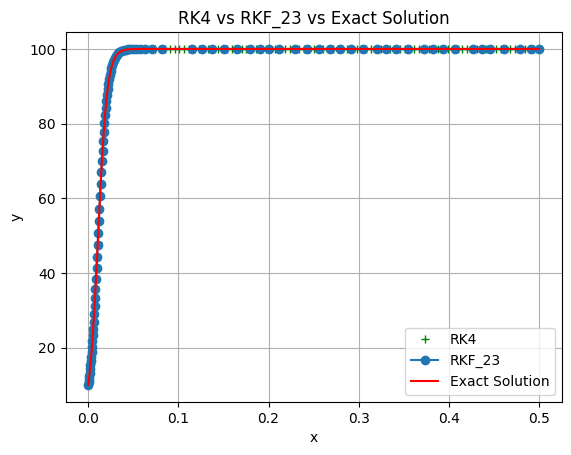

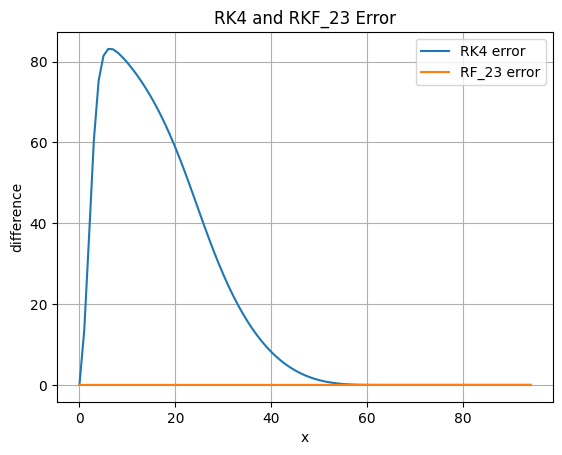

In [89]:
# Your plot
# YOUR CODE HERE
# raise NotImplementedError()

def f(x,y):
    return 2*y*(100-y)

def exact(x):
    return 100/(np.exp(-200*x + np.log(9)) + 1)

y0 = 10
a = 0
b = 0.5

x_vals, y_vals = RKF_23(f, a, b, y0, 1e-4)
exacts = exact(x_vals)

num_points = len(x_vals)
x_rk4, y_rk4 = RK_4(f, a, b, y0, (b-a)/(num_points-1))

plt.plot(x_rk4, y_rk4, 'g+', label='RK4')
plt.plot(x_vals, y_vals, 'o-', label='RKF_23')
plt.plot(x_vals, exacts, 'r-', label='Exact Solution')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'RK4 vs RKF_23 vs Exact Solution')
plt.grid()
plt.show()

plt.plot(y_rk4-exacts, label="RK4 error")
plt.plot(y_vals-exacts, label="RF_23 error")
plt.xlabel('x')
plt.ylabel('difference')
plt.legend()
plt.title(f'RK4 and RKF_23 Error')
plt.grid()
plt.show()

In [ ]:
#Testing answer 


In [ ]:
#Testing answer 


YOUR ANSWER HERE